# Homework 4
### Josh Cohen

In [19]:
import numpy as np
import sympy as sym
%matplotlib notebook
from matplotlib import pyplot as plt 
from scipy.optimize import minimize

## Probelm 1
Design an Armijo linesearch function that takes a function, its derivative, a test point x, and a descent direction z that then returns the new x that satisfies the sufficient descrease property. 

Using a starting guess of $x = [10,10]^T$, $\alpha = 0.4$, $\beta = 0.7$, minimize $f(x,y) = x^2 = 100y^2$. Turn in solution for $(x,y)$ and plot evaluation of the function at every iteration .

In [66]:
alpha = 0.4
beta = 0.7 
x, y, z0, z1, gamma = sym.symbols('x y z_0 z_1 gamma')
z = sym.Matrix([z0, z1])
q = sym.Matrix([x, y])
f = sym.Matrix([1,100]).T * sym.Matrix([x**2, y**2])
Df = f.jacobian(q)
local_quad = sym.lambdify([z, q], Df.dot(z) + z.dot(z))
Df_lam = sym.lambdify([q], Df)
f_lam = sym.lambdify([q], f)
f.shape
suff_compare = sym.lambdify([q, z, gamma], f + alpha * gamma * Df * z)

In [70]:
#determine how to choose z based on local quad model
# ans = minimize(local_quad, [0,0], ([10,10]))
# init_z = ans.x
q_test = np.array([10, 10])
z_i = np.array([0,0])
eps = 10e-3

vals = np.zeros(250)

In [71]:
iter_count = 0
vals[iter_count] = f_lam(q_test)
while(np.linalg.norm(Df_lam(q_test)) > eps):
    iter_count += 1
    z_i = minimize(local_quad, z_i, (q_test)).x
    n = 0
    gam = beta**n
    while np.linalg.norm(f_lam(q_test + gam * z_i)) > np.linalg.norm(suff_compare(q_test, z_i, gam)):
        n += 1
        gam = beta**n
        
    q_test = q_test + gam * z_i
    vals[iter_count] = f_lam(q_test) 

<IPython.core.display.Javascript object>


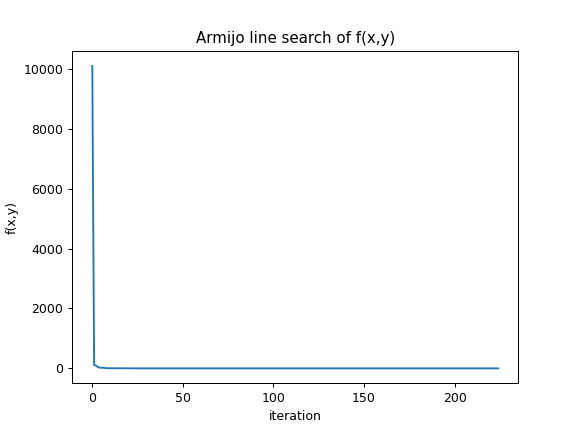

<IPython.core.display.Javascript object>


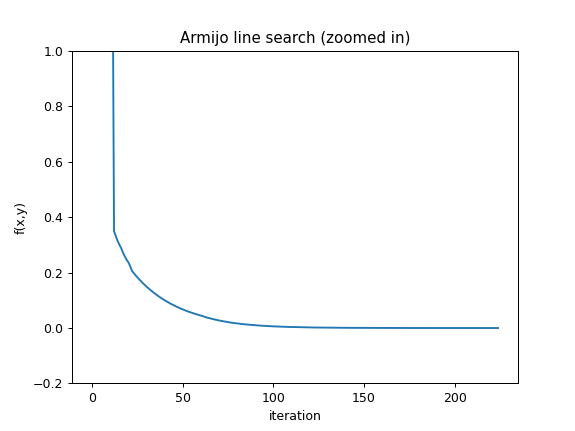

In [80]:
yvals = vals[:iter_count]
xvals = np.arange(iter_count)
plt.figure()
plt.plot(xvals, yvals)
plt.xlabel("iteration")
plt.ylabel("f(x,y)")
plt.title("Armijo line search of f(x,y)")
plt.show()
plt.figure()
plt.plot(xvals, yvals)
plt.ylim([-.2, 1])
plt.title("Armijo line search (zoomed in)")
plt.xlabel("iteration")
plt.ylabel("f(x,y)")
plt.show()